# Visualzing Differences Between Groups - A Machine Learning Perspective

In data science, we often want to determine if some feature is the same or different between two groups.  For example, did male passengers on the Titanic tend to be older than female passengers?  Did they tend to be more well off (and pay higher fares for passage)?  

In this lesson we will learn to create and interpret visualizations to compare groups.

## Were male passengers older than female passengers on the Titanic?

The first way we could answer this question is by calculating summary statistics for the two groups like the mean and median.

In [1]:
#Don't forget to import pandas and create the DataFrame

import pandas as pd

df = pd.read_csv('assets/titanic_passengers.csv')

#There are different ways to do this, but I'm demonstrating .groupby() here

age_sex_means = df.groupby('Sex')['Age'].mean()
age_sex_medians = df.groupby('Sex')['Age'].median()

#We can print text to help interpret our results
print('Mean age by passenger sex:')
print(age_sex_means)

#You can even print blank space
print('                            ')

print('Median age by passenger sex:')
print(age_sex_medians)


Mean age by passenger sex:
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
                            
Median age by passenger sex:
Sex
female    27.0
male      29.0
Name: Age, dtype: float64


It appears that male passengers were slightly older than female passengers, but is that because there were a whole bunch of 30-year-old men and 27-year-old women on the Titanic or because there were some older men on board but no older women?  Or something completely different?  This is where visualizing the distribution of the data of both groups comes in handy.  To do this, we'll use a new Python package called Seaborn.

# Seaborn
Seaborn is a Python data visualization library based on `matplotlib` (which we have used a little bit before). It provides a higher-level interface for drawing attractive and informative statistical graphics. Here's a brief history and overview:

**Origin**: Seaborn was created by Michael Waskom, who started the project during his graduate studies. The library was intended to make visualizations that are directly related to statistical analyses more accessible and to improve upon some of the default aesthetics provided by `matplotlib`.

**Name Origin**: The name "Seaborn" is actually a reference to a character named Sam Seaborn from the television show "The West Wing". Michael Waskom, the creator, has confirmed this in discussions online.

**Aesthetics and Themes**: One of the first things users notice about Seaborn is its capability to produce visually pleasing plots with just default settings. Seaborn comes with several themes and color palettes that are designed to reveal patterns in data in a manner that's visually appealing and easily interpretable.

**Functionalities**: Over the years, Seaborn has introduced many functionalities that simplify complex visualization tasks. Some popular plot types and features in Seaborn include:
* `relplot`: Relational plots for visualizing statistical relationships between variables.
* `catplot`: Categorical plots for visualizing categorical data distributions.
* `distplot`/`histplot`: For visualizing the distribution of dataset.
* `heatmap`: For visualizing matrix-like data.
* `pairplot`: To plot pairwise relationships in a dataset.
* Integrated functions to work with `pandas` DataFrames.


## Comparing histograms

We've looked at the histogram of a single feature before using the Pandas built-in plotting functions, but let's see how we do it using Seaborn with the `histplot` method.  Below we'll visualize the distribution of the age of all passengers on the Titanic.

By convention, we import `seaborn` as `sns`.  We'll also import `matplotlib.pyplot` for use later.

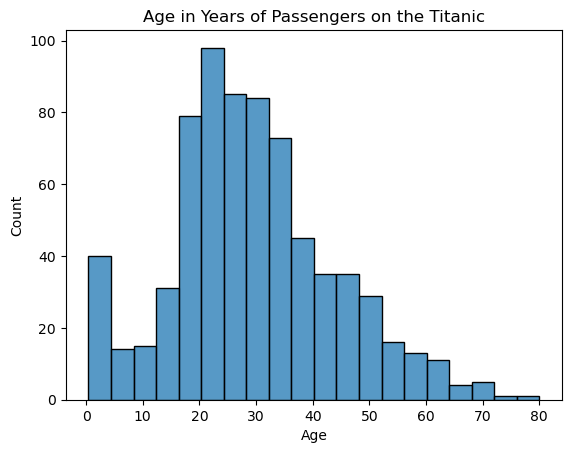

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
plt.title("Age in Years of Passengers on the Titanic")
plt.show()

**What can we say about the age of Titanic passengers?**

Most of them seemed to be between about 17 and 37 years old, and there were also a lot of infants around age 3 or less.  There were very few older people.

A distribution that has a peak in the middle and is on even on both sides is called Normal (or Gaussian).  This graph has its peak more toward the left with a long tail to the right.  **We call histograms like this skewed to the right.**  If, on the other hand, the long tail had extended to the left, the histogram would be called skewed to the left.

Will the distribution of male and female passengers look similar to this?  Or different?  Let's find out by overlaying two histograms over each other.  This will also give us some practice with our Pandas skills.

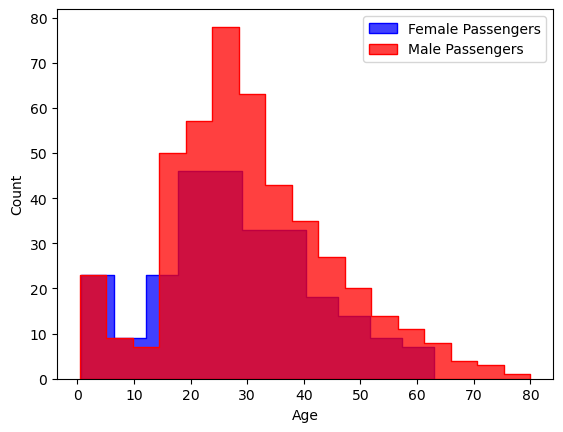

In [3]:
# First we need to split our data into the two groups we want to compare.  In the past, we wrote the condition on a separate line.  
# I'm writing the condition and the subsetting on the same line here to save space.

female = df.loc[df['Sex'] == 'female']
male = df.loc[df['Sex'] == 'male']

# Create overlaid histograms.  Element = 'step' makes it easier to see the overlaid plots
sns.histplot(female['Age'], element="step", stat="count", label="Female Passengers", color="blue")
sns.histplot(male['Age'], element="step", stat="count", label="Male Passengers", color="red")

#We're using Matplotlib here to show the legend
plt.legend()
plt.show()


What do you notice about the plots?
* Are there more male or female passengers?
* What sex are the passengers over age 65?
* In what age range were there more female than male passengers?

Looking at the histograms gives a more complete picture about the difference in the age distribution between male and female passengers.

## Comparing box plots

A different figure we can use to compare the distribution of two or more groups, which you may or may not have seen in the past, is called a box plot.

Box plots (originally called box and whisker plots) were developed by John Tukey, an influential American mathematician and statistician known for his significant contributions to various areas within the field of statistics and beyond

Box plots make it easy for us to visualize and compare 6 different aspects of the distribution of a feature: the minimum, the 25th percentile, the median, the 75th percentile, the range, and the middle 50th percentile.  Let's take a look at a box plot of the distribution of age of all passengers on the Titanic.

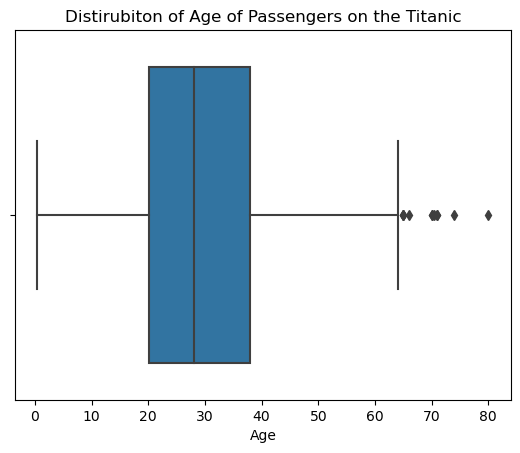

In [4]:
# Create the boxplot
sns.boxplot(x='Age', data=df)

# We need to use Matplotlib to add a title
plt.title('Distirubiton of Age of Passengers on the Titanic')

# Display the plot
plt.show()


The vertical lines on the box plot indicate the values of the minimum, the 25th percentile, the median, the 75th percentile and the max.

Estimating visually, we can see min = 0, 25th percentile = 20, median = 28ish, 75th percentile, = 38ish, and the maximum value is around 80.  We can calculate these values (which are also known as the 5-number summary) exactly using the `.describe()` method.  Note that the median is the same as the 50th percentile.

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The little diamonds on the right hand side indicate outliers.  These are values that are unusually large (or, in some cases, unusually small) compared to the rest of the values in the distribution.  We could interpret these diamonds as individuals who are much older than everyone else on the Titanic.

Finally, we can talk about the spread of the data in two ways.  First, we can talk about the entire range of values: from age 0 to age 80.  Second, we can talk about what's called the interquartile range or IQR.  This is the difference between the 75th and 25th percentile and is easily recognized as the area in the box of the box plot.  It's important because it tells us about the middle 50% of the values of our feature.

**What is the interqurtile range of age?**  

Now let's compare the box plots of age for male and female passengers.

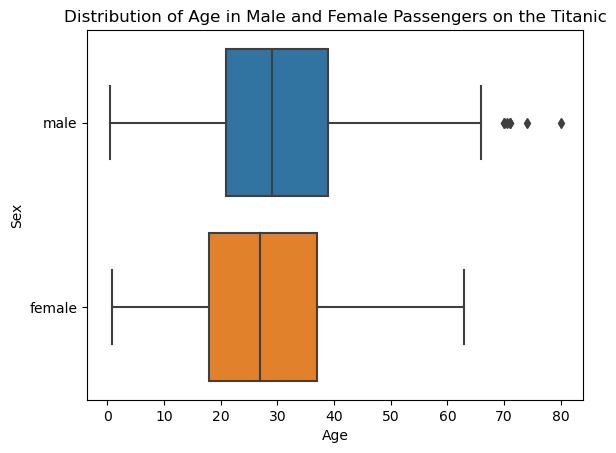

In [6]:
# Create the boxplot
sns.boxplot(x='Age', y='Sex', data=df)

# We need to use Matplotlib to add a title
plt.title('Distribution of Age in Male and Female Passengers on the Titanic')

# Display the plot
plt.show()

**How old was the oldest female passenger?**

**Were there any age ouliers among female passengers?**

**If you compared just the middle 50% of observations, which group tends to be older, male passengers or female passengers?**

# Visualizing relationships between groups - A/B Testing

A/B testing, also known as split testing, is a method used to compare two versions of a web page, application, advertisement, or other marketing material to determine which one performs better. The essence of an A/B test is to conduct a controlled experiment with two variants, A and B, where A typically represents the current version (control), and B is the new version (test).

Often we have additional information about the customer beyond just the A/B condition and the outcome.  In this case, we also know how many times the customer saw the ad or PSA.  Were customers who saw the ad more times more likely to convert?  Was this also true for the PSA?

In [8]:
marketing_data = pd.read_csv('assets/marketing_AB.csv')
marketing_data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


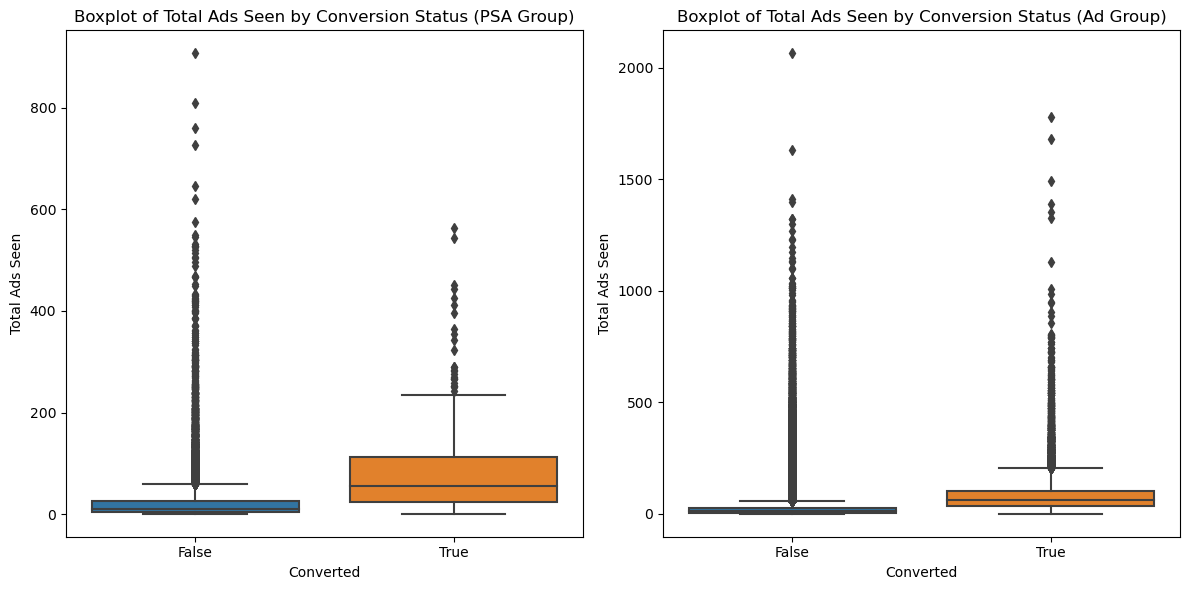

In [7]:
marketing_data = pd.read_csv('assets/marketing_AB.csv')

#The plt.subplot(1, 2, 1) command in Matplotlib is used for creating subplots within a figure. 
#The function subplot divides the figure into a grid and allows you to specify which part of the
#grid you want to place your plot in. The command takes three arguments: nrows, ncols, and index.
#nrows (1): The number of rows in the grid. In this case, 1 means there is only one row of subplots.
#ncols (2): The number of columns in the grid. 2 indicates that there are two columns of subplots.
#index (1): The position of the subplot in the grid. The grid positions are numbered starting from 1, 
#moving left to right and top to bottom. Here, 1 refers to the first subplot, which will be located in the first column.
#So, plt.subplot(1, 2, 1) means that you are creating a subplot in the first column of a figure that 
#has been divided into 1 row and 2 columns. Similarly, plt.subplot(1, 2, 2) would refer to the second subplot, 
#which will be placed in the second column of this grid.

# Creating side-by-side boxplots for the total ads seen, separated by test group (PSA vs Ad)
plt.figure(figsize=(12, 6))

# Boxplot for those who saw the PSA
plt.subplot(1, 2, 1)
sns.boxplot(x='converted', y='total ads', data=marketing_data[marketing_data['test group'] == 'psa'])
plt.title('Boxplot of Total Ads Seen by Conversion Status (PSA Group)')
plt.xlabel('Converted')
plt.ylabel('Total Ads Seen')

# Boxplot for those who saw the Ad
plt.subplot(1, 2, 2)
sns.boxplot(x='converted', y='total ads', data=marketing_data[marketing_data['test group'] == 'ad'])
plt.title('Boxplot of Total Ads Seen by Conversion Status (Ad Group)')
plt.xlabel('Converted')
plt.ylabel('Total Ads Seen')

plt.tight_layout()
plt.show()

**What do you notice about the shape of the distirbution?**  Is it symmetric or skewed?  Is it easy to tell if the number of ad views was related to whether a customer converted?

One common way to handle data that is skewed is to look at relationships with the natural logarithm of that feature.  Trends that are true for the natural logarithm of a feature are also true for that feature itself.

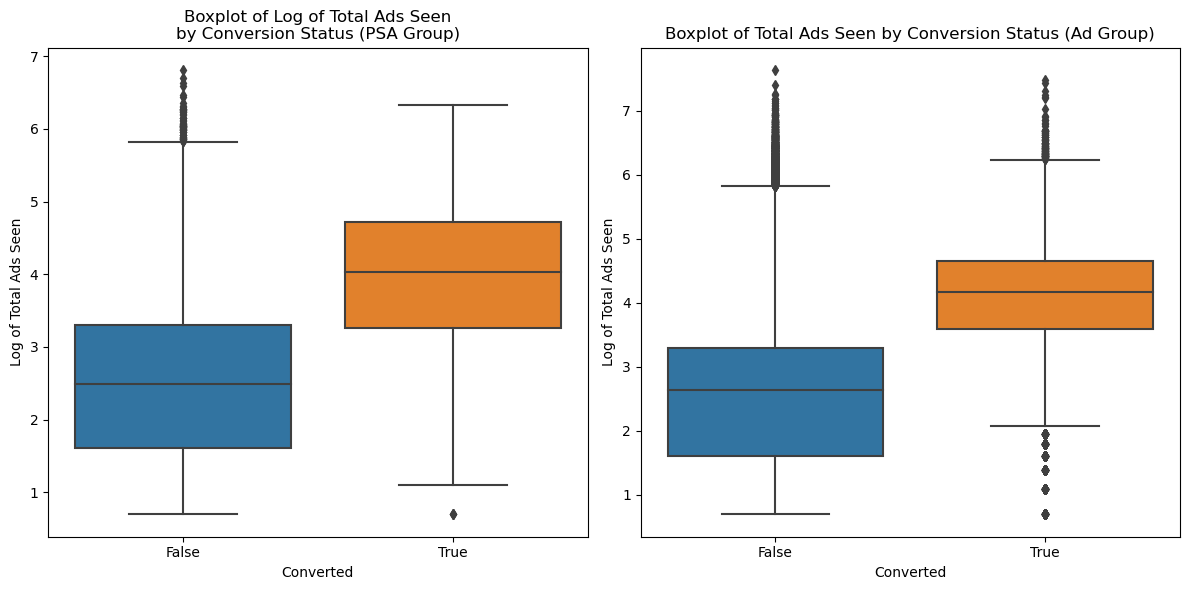

In [8]:
import numpy as np

# Adding a small constant to total ads and applying natural logarithm transformation
marketing_data['log_total_ads'] = np.log(marketing_data['total ads'] + 1)

# Creating side-by-side boxplots for the log-transformed total ads seen, separated by test group
plt.figure(figsize=(12, 6))

# Boxplot for those who saw the PSA
plt.subplot(1, 2, 1)
sns.boxplot(x='converted', y='log_total_ads', data=marketing_data[marketing_data['test group'] == 'psa'])
plt.title('Boxplot of Log of Total Ads Seen\nby Conversion Status (PSA Group)')
plt.xlabel('Converted')
plt.ylabel('Log of Total Ads Seen')

# Boxplot for those who saw the Ad
plt.subplot(1, 2, 2)
sns.boxplot(x='converted', y='log_total_ads', data=marketing_data[marketing_data['test group'] == 'ad'])
plt.title('Boxplot of Total Ads Seen by Conversion Status (Ad Group)')
plt.xlabel('Converted')
plt.ylabel('Log of Total Ads Seen')

plt.tight_layout()
plt.show()

Now what do you conclude about the relationship of the number of ads seen to whether or not someone converted?  Is this true for both the ad and the PSA?  Any thoughts on why that might be?

## Box plots vs histograms

Box plots and histograms show similar but not identical information.  Here are some strengths and weaknesses of both.  

### Histogram:

**Mode:** A histogram can clearly show unimodal, bimodal, or multimodal distributions, which are distributions with one, two, or multiple peaks, respectively.

**Skewness:** The direction and degree of skewness (asymmetry) can be easily discerned from a histogram. You can visually determine if the distribution is skewed to the left (negatively skewed) or to the right (positively skewed).

**Gaps and Outliers:** While histograms aren’t the best for identifying individual outliers, they are excellent for spotting gaps in data or unusual spikes, which could suggest possible outliers or data collection issues.

**General Shape:** The overall shape of the distribution (bell-shaped, uniform, exponential, etc.) can be inferred from a histogram.

### Box Plot:

**Median:** The central line inside the box represents the median of the dataset. It gives a clear indication of the dataset's central tendency.

**Interquartile Range (IQR):** The size of the box represents the IQR, which is the range between Q1 and Q3. This shows the spread of the central 50% of the data.

**Outliers:** One of the key advantages of box plots is the ability to easily visualize outliers. Data points outside the "whiskers" are typically considered outliers and are often plotted individually.

**Spread and Symmetry:** The spread of the data can be inferred from the range (difference between the minimum and maximum) and the IQR. The symmetry of the distribution about the median can also be inferred to some degree.

**Comparisons:** Box plots are particularly useful when comparing distributions across groups. Side-by-side box plots can quickly reveal differences in medians, spreads, and the presence of outliers across multiple groups.


What is one aspect of the difference in the distribution of age between male and female passengers that is easier to observe from the histogram than from the box plot?  What is one aspect that is easier to observe from the boxplot than the histogram?

## Box plot variations

There are more recent updates to the boxplot so that they can contain even more information about the distribution of a feature.

The **violin plot** shows more detail about exactly where within each quartile observations tend to fall.

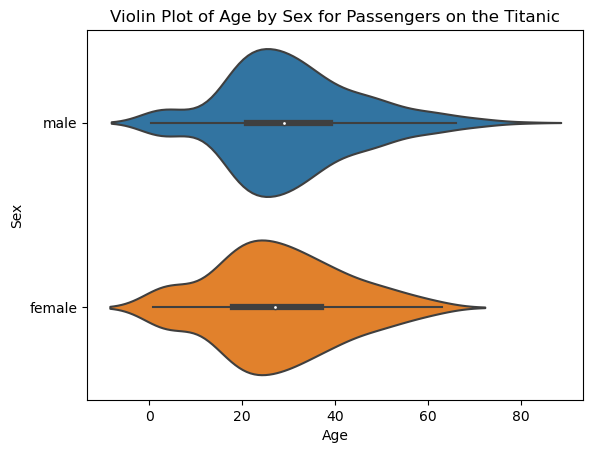

In [9]:
# Create a violin plot
sns.violinplot(x='Age', y='Sex', data=df)

# Add a title
plt.title('Violin Plot of Age by Sex for Passengers on the Titanic')

# Show the plot
plt.show()

The **swarm plot**, which plots a dot for ever observation, gives us a better sense how many more male than female passengers were aboard the Titanic.

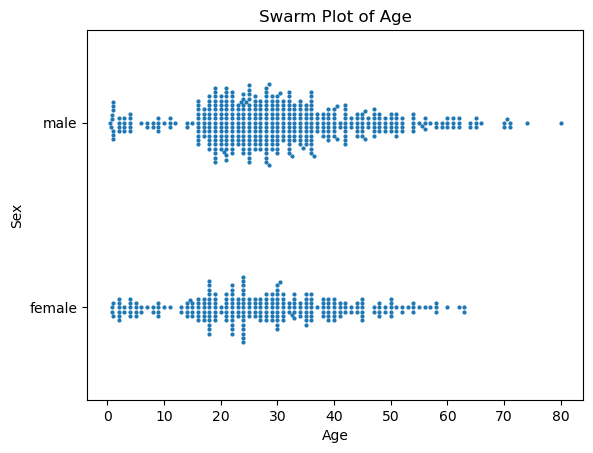

In [10]:
# Create a swarm plot - we have to reduce the size of the markers so we can visualize them all on the same graph
sns.swarmplot(x='Age', y='Sex', data=df, size=3)

# Add a title
plt.title('Swarm Plot of Age')

# Show the plot
plt.show()

## OK
In this lesson, we learned how to compare distributions between groups.  Starting next week, we'll look at modeling relationships between two quantitative features.